**Heart Attack Analysis**

**The Data has been collected from the website www.kaggle.com/datasets.**

**This data collects medical information about patients with a tendendy to have a Heart Condition. It collects 303 records with 14 features. These features are medical information of the patient.**

**The variables that we have are mainly Numerical expect for the column 'Sex' and the Column 'Output'which the variable that will help us to predict whether a patient HAS (marked with a 1) or HAS NOT (marked with a 0) a Heart Condition.**

Heart Attack Analysis

About this dataset:

From https://www.kaggle.com/datasets

age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

exng: Exercise induced angina ~ 1 = Yes, 0 = No

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

output: Target variable

target : 0 = Does Not Have Heart Disease 1 = Has a Heart Disease

In [1]:
# Importing the relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb 
%matplotlib inline
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [2]:
#Reading the Dataset 
data = pd.read_excel("heart.xlsx")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1


In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0
301,57,1,0,130,131,0,1,115,1,12,1,1,3,0


In [4]:
data.shape

(303, 14)

In [5]:
#Reading the Dataset 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1


Exploring the Dataset: 

In [6]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0
301,57,1,0,130,131,0,1,115,1,12,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0,1,1,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slp       303 non-null    int64
 11  caa       303 non-null    int64
 12  thall     303 non-null    int64
 13  output    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [8]:
print('Number of rows are', data.shape [0], ' Number of columns are', data.shape[1])

Number of rows are 303  Number of columns are 14


In [9]:
#Checking for Null Values
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No null values found

Checking for Duplicates 

In [10]:
data.duplicated().sum()

1

In [11]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0,2,4,2,1


In [12]:
#Removing the duplicates
data.drop_duplicates(keep='first',inplace=True)

In [13]:
print('Number of rows are', data.shape [0], ' Number of columns are', data.shape[1])

Number of rows are 302  Number of columns are 14


In [14]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0
301,57,1,0,130,131,0,1,115,1,12,1,1,3,0


Statistical Data

In [15]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,8.672185,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,11.025574,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,4.000000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,14.000000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,62.000000,2.000000,4.000000,3.000000,1.000000


In [16]:
data['output'].value_counts()

# 1 = Defective Heart
# 0 = Healthy Heart

1    164
0    138
Name: output, dtype: int64

In [17]:
data[data["sex"]==1]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1,1,2,1,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0


In [18]:
data[data["sex"]==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,13,1,0,2,1
11,48,0,2,130,275,0,1,139,0,2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2,1,1,3,0
292,58,0,0,170,225,1,0,146,1,28,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0


- This is an observation of the difference between sex wich are collected in this dataset

Number of people being with sex as 1 are 96 and Number of people with sex as 0 are 206


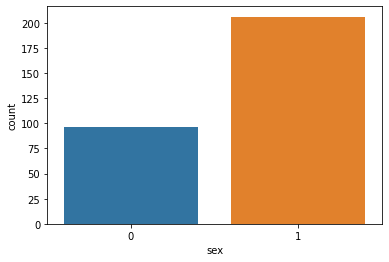

In [62]:
x=(data.sex.value_counts())
print(f'Number of people being with sex as 1 are {x[0]} and Number of people with sex as 0 are {x[1]}')
p = sns.countplot(data=data, x="sex")
plt.show()



Considering the Data we already have, how many people belong to group 0 = Does Not Have Heart Disease and how many to the group 1 = Has a Heart Disease? 

C:\Users\flore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    164
0    138
Name: output, dtype: int64

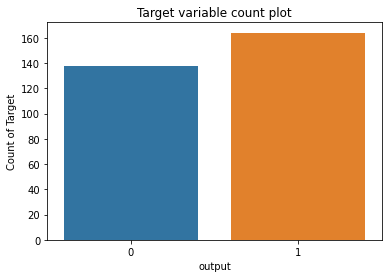

In [63]:
sns.countplot(data['output'])
plt.xlabel('output')
plt.ylabel('Count of Target')
plt.title('Target variable count plot')
plt.show

data['output'].value_counts()

# 1 = HAS a Heart Disease
# 0 = Does NOT have a Heart Disease 

In [20]:
correlation_matrix = data.corr()
correlation_matrix


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.183719,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.110813,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.073461,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.159531,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.027216,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,-0.027243,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.012532,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.269236,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.234840,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.183719,0.110813,-0.073461,0.159531,0.027216,-0.027243,-0.012532,-0.269236,0.234840,1.000000,-0.512736,0.150590,0.147530,-0.337718


**Question:**

**Which variables have more significant impact on the Target variable or Output. In other words, which variables affect the chances of a Heart Attack?**

Correlation Matrix 

<AxesSubplot:>

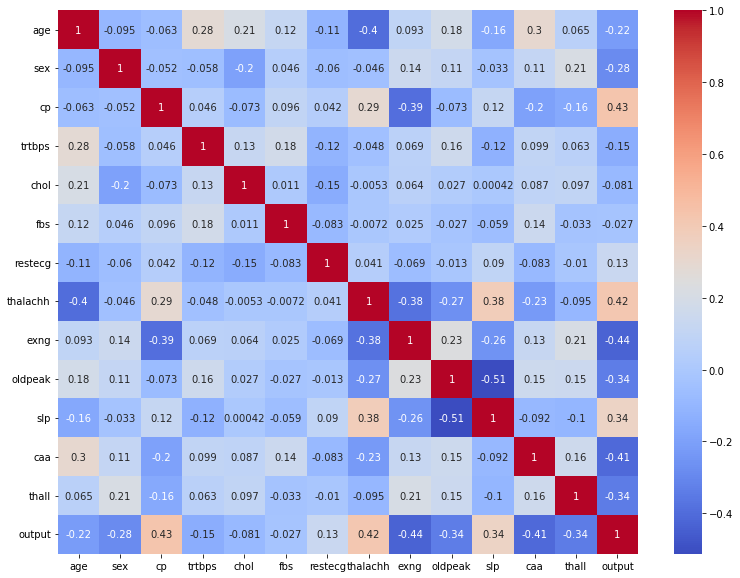

In [21]:
#Display Correlation Matrix in Heatmap

plt.figure(figsize =(13,10))
sns.heatmap(correlation_matrix, annot = True,cmap='coolwarm' )

# cp: Chest pain / trtbps: Resting blood pressure / chol: Cholestoral

# fbs: fasting blood sugar > 120 mg / restecg: Resting electrocardiographic results

# thalachh: Maximum heart rate achieved / exng: Exercise induced angina ~ 1 = Yes, 0 = No

# oldpeak: Previous peak / slp: Slope / caa: Number of major vessels

# thall: Thalium Stress Test result ~ (0,3) / output: Target variable



The Correlation Matrix shows with its Heatmap that the variable cp: Chest pain has the highest score impact 

on the probability of having a Heart Attack; as well as the variable thalachh: Maximum heart rate achieved. 
    
In third place, we see the variable slp: Slope. 
    
The variable restecg: Resting electrocardiographic results, has less impact on the chances of having a Heart attack; 
    
however, it is to be considered.
        
    
It is interesting to note that Age and Sex are Not significant variables  affect the Outcome.
    

In [22]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0
301,57,1,0,130,131,0,1,115,1,12,1,1,3,0


**We would like predict the Outcome through two Classification Models**

**Standarization of Data**

In [23]:
from sklearn import preprocessing 
#import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [24]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0
301,57,1,0,130,131,0,1,115,1,12,1,1,3,0


In [25]:
data_satandard_scaler = preprocessing.StandardScaler().fit_transform(data)
# estandarizado = (X - media) / std

data_robust_scaler = preprocessing.RobustScaler().fit_transform(data)

data_satandard_scaler

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -0.71491124,
        -2.1479552 ,  0.91731315],
       [-1.92854796,  0.68265615,  1.005911  , ..., -0.71491124,
        -0.51399432,  0.91731315],
       [-1.48572607, -1.46486632,  0.0353515 , ..., -0.71491124,
        -0.51399432,  0.91731315],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ...,  1.27497996,
         1.11996657, -1.09014026],
       [ 0.28556146,  0.68265615, -0.93520799, ...,  0.28003436,
         1.11996657, -1.09014026],
       [ 0.28556146, -1.46486632,  0.0353515 , ...,  0.28003436,
        -0.51399432, -1.09014026]])

In [26]:
data_robust_scaler

array([[ 0.57692308,  0.        ,  1.        , ...,  0.        ,
        -1.        ,  0.        ],
       [-1.42307692,  0.        ,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-1.11538462, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.96153846,  0.        , -0.5       , ...,  2.        ,
         1.        , -1.        ],
       [ 0.11538462,  0.        , -0.5       , ...,  1.        ,
         1.        , -1.        ],
       [ 0.11538462, -1.        ,  0.        , ...,  1.        ,
         0.        , -1.        ]])

* We neet to split our dataset into its attributes and labels:

In [27]:
y = data['output'] # Label 
X = data.drop(['output'], axis = 1) # Features 

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [29]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,23,0,0,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2
2,41,0,1,130,204,0,0,172,0,14,2,0,2
3,56,1,1,120,236,0,1,178,0,8,2,0,2
4,57,0,0,120,354,0,1,163,1,6,2,0,2


* Splitting Data into Train and Test Sets

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [32]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
287,57,1,1,154,232,0,0,164,0,0,2,1,2
282,59,1,2,126,218,1,1,134,0,22,1,1,1
198,62,1,0,120,267,0,1,99,1,18,1,2,3
158,58,1,1,125,220,0,1,144,0,4,1,4,3
165,67,1,0,160,286,0,0,108,1,15,1,3,2


- Standardscaler - Standardization of Data - 

In [33]:
scaler = StandardScaler().fit(X_train)

In [34]:
print(scaler)

StandardScaler()


In [35]:
scaler.mean_

array([5.45000000e+01, 6.50442478e-01, 1.00884956e+00, 1.31088496e+02,
       2.45513274e+02, 1.28318584e-01, 5.26548673e-01, 1.49305310e+02,
       3.00884956e-01, 8.41592920e+00, 1.40707965e+00, 6.90265487e-01,
       2.32300885e+00])

In [36]:
scaler.scale_

array([ 9.13141519,  0.47683022,  1.04327238, 17.78661997, 53.04449878,
        0.3344442 ,  0.53356668, 22.19761743,  0.45864278, 10.62866858,
        0.61164464,  1.00070458,  0.6002225 ])

In [37]:
scaler.transform(X_train)

array([[ 0.27378013,  0.73308592, -0.0084825 , ...,  0.96938698,
         0.30951643, -0.53814852],
       [ 0.49280423,  0.73308592,  0.95003995, ..., -0.66554927,
         0.30951643, -2.20419735],
       [ 0.82134038,  0.73308592, -0.96700495, ..., -0.66554927,
         1.30881235,  1.12790032],
       ...,
       [ 1.58792473,  0.73308592,  1.9085624 , ..., -0.66554927,
         0.30951643, -0.53814852],
       [ 0.71182833,  0.73308592,  1.9085624 , ..., -0.66554927,
         1.30881235, -0.53814852],
       [ 0.93085243, -1.36409659, -0.0084825 , ...,  0.96938698,
         1.30881235, -0.53814852]])

In [38]:
X_train_scaled = scaler.transform(X_train)

In [39]:
#Values for X train are standarised

print(X_train_scaled)

[[ 0.27378013  0.73308592 -0.0084825  ...  0.96938698  0.30951643
  -0.53814852]
 [ 0.49280423  0.73308592  0.95003995 ... -0.66554927  0.30951643
  -2.20419735]
 [ 0.82134038  0.73308592 -0.96700495 ... -0.66554927  1.30881235
   1.12790032]
 ...
 [ 1.58792473  0.73308592  1.9085624  ... -0.66554927  0.30951643
  -0.53814852]
 [ 0.71182833  0.73308592  1.9085624  ... -0.66554927  1.30881235
  -0.53814852]
 [ 0.93085243 -1.36409659 -0.0084825  ...  0.96938698  1.30881235
  -0.53814852]]


In [40]:
print(X_train_scaled.mean(axis=0))

[ 3.92999301e-18 -6.68098811e-17  1.17899790e-17  4.32299231e-16
 -5.50199021e-17  4.91249126e-18 -3.92999301e-17 -5.81638965e-16
 -7.46698671e-17 -7.85998602e-17  3.92999301e-17  1.33619762e-16
 -2.35799580e-16]


In [41]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [42]:
X_train_scaled

array([[ 0.27378013,  0.73308592, -0.0084825 , ...,  0.96938698,
         0.30951643, -0.53814852],
       [ 0.49280423,  0.73308592,  0.95003995, ..., -0.66554927,
         0.30951643, -2.20419735],
       [ 0.82134038,  0.73308592, -0.96700495, ..., -0.66554927,
         1.30881235,  1.12790032],
       ...,
       [ 1.58792473,  0.73308592,  1.9085624 , ..., -0.66554927,
         0.30951643, -0.53814852],
       [ 0.71182833,  0.73308592,  1.9085624 , ..., -0.66554927,
         1.30881235, -0.53814852],
       [ 0.93085243, -1.36409659, -0.0084825 , ...,  0.96938698,
         1.30881235, -0.53814852]])

In [43]:
X_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
180,55,1,0,132,353,0,1,132,1,12,1,1,3
229,64,1,2,125,309,0,1,131,1,18,1,0,3
111,57,1,2,150,126,1,1,173,0,2,2,1,3
247,66,1,1,160,246,0,1,120,1,0,1,3,1
60,71,0,2,110,265,1,0,130,0,0,2,1,2


In [44]:
scaler = StandardScaler().fit(X_test)

In [45]:
scaler.mean_

array([5.41842105e+01, 7.76315789e-01, 8.28947368e-01, 1.33131579e+02,
       2.49434211e+02, 2.10526316e-01, 5.26315789e-01, 1.50355263e+02,
       4.07894737e-01, 9.43421053e+00, 1.36842105e+00, 8.02631579e-01,
       2.28947368e+00])

In [46]:
scaler.scale_

array([ 8.72942774,  0.41671283,  0.97856175, 16.66807704, 47.21600295,
        0.40768246,  0.499307  , 24.7289006 ,  0.49144341, 12.03102954,
        0.62496537,  1.01332876,  0.64513951])

In [47]:
scaler.transform(X_test)

array([[ 0.0934528 ,  0.53678263, -0.84710788, -0.06788899,  2.19344678,
        -0.51639778,  0.9486833 , -0.74225957,  1.20482899,  0.21326433,
        -0.58950634,  0.19477235,  1.10135297],
       [ 1.12444822,  0.53678263,  1.19670795, -0.48785345,  1.26155934,
        -0.51639778,  0.9486833 , -0.78269809,  1.20482899,  0.71197477,
        -0.58950634, -0.79207421,  1.10135297],
       [ 0.32256289,  0.53678263,  1.19670795,  1.01201962, -2.61424523,
         1.93649167,  0.9486833 ,  0.91571951, -0.82999331, -0.61791973,
         1.01058231,  0.19477235,  1.10135297],
       [ 1.35355831,  0.53678263,  0.17480004,  1.61196885, -0.07273404,
        -0.51639778,  0.9486833 , -1.22752174,  1.20482899, -0.78415654,
        -0.58950634,  2.16846546, -1.99875169],
       [ 1.92633354, -1.86295148,  1.19670795, -1.3877773 ,  0.3296719 ,
         1.93649167, -1.05409255, -0.8231366 , -0.82999331, -0.78415654,
         1.01058231,  0.19477235, -0.44869936],
       [ 0.32256289,  0.536782

In [48]:
X_test_scaled = scaler.transform(X_test)

In [49]:
#Values for X Test are standarised

print(X_test_scaled)

[[ 0.0934528   0.53678263 -0.84710788 -0.06788899  2.19344678 -0.51639778
   0.9486833  -0.74225957  1.20482899  0.21326433 -0.58950634  0.19477235
   1.10135297]
 [ 1.12444822  0.53678263  1.19670795 -0.48785345  1.26155934 -0.51639778
   0.9486833  -0.78269809  1.20482899  0.71197477 -0.58950634 -0.79207421
   1.10135297]
 [ 0.32256289  0.53678263  1.19670795  1.01201962 -2.61424523  1.93649167
   0.9486833   0.91571951 -0.82999331 -0.61791973  1.01058231  0.19477235
   1.10135297]
 [ 1.35355831  0.53678263  0.17480004  1.61196885 -0.07273404 -0.51639778
   0.9486833  -1.22752174  1.20482899 -0.78415654 -0.58950634  2.16846546
  -1.99875169]
 [ 1.92633354 -1.86295148  1.19670795 -1.3877773   0.3296719   1.93649167
  -1.05409255 -0.8231366  -0.82999331 -0.78415654  1.01058231  0.19477235
  -0.44869936]
 [ 0.32256289  0.53678263  1.19670795  1.01201962 -1.72471631 -0.51639778
   0.9486833   0.95615803 -0.82999331  0.54573796  1.01058231 -0.79207421
  -0.44869936]
 [-0.93754262 -1.86295

In [50]:
print(X_test_scaled.mean(axis=0))

[ 2.11271059e-16  4.67462326e-17 -3.54248794e-17  6.12813893e-16
  1.90636980e-16  9.34924652e-17  8.76491862e-17 -1.24169680e-16
 -7.59626280e-17 -7.30409885e-18 -1.63611814e-16 -5.69719710e-17
  3.44023056e-16]


In [51]:
print(X_test_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- **Model for Classification: Support Vector Machine**

In [52]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [53]:
# Predicting the Test set results:
y_pred = classifier.predict(X_test_scaled)

In [54]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

**Confusion Matrix**

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



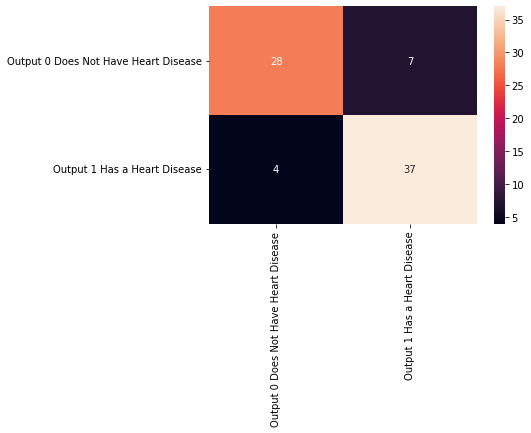

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['Output 0 Does Not Have Heart Disease','Output 1 Has a Heart Disease']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

**Cross Validation**

In [57]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



In [58]:
cv_score_svc = cross_val_score(SVC(kernel='linear'),X, y, cv = 5 )

print(cv_score_svc)
#print(cross_val_score(lr, X_train_scaled, y_train, cv=2))

[0.83606557 0.91803279 0.83333333 0.85       0.76666667]


- Comparing the performance of the Models -

- **Model for Classsification: Random Forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (criterion = 'gini',
                             max_depth = 8,
                             min_samples_split = 10,
                             random_state = 5)

In [65]:
clf.fit(X_train_scaled, y_train )

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [66]:
y_pred = clf.predict(X_test_scaled)

In [67]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28,  7],
       [ 6, 35]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8289473684210527

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



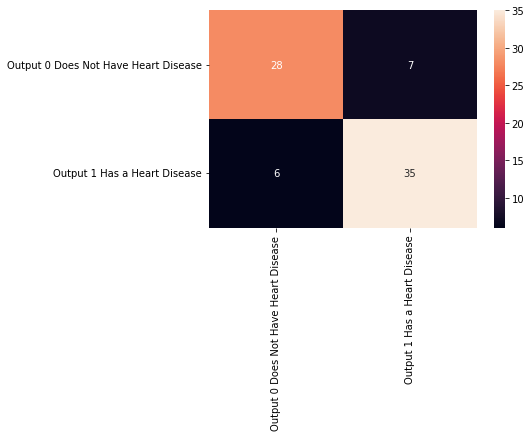

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['Output 0 Does Not Have Heart Disease','Output 1 Has a Heart Disease']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

**Conclusion**
    
Out of the Two Classification Models, the Support Vector Machine has the highest Accuracy Score of 0.86

as oppose as

Random Forest with an Accuracy Score of 0.83

In [72]:
clf.feature_importances_

array([0.0693289 , 0.0280006 , 0.15021435, 0.05593585, 0.04611813,
       0.00774266, 0.01405542, 0.12357023, 0.07386806, 0.07586379,
       0.05022272, 0.16762062, 0.13745868])

In [74]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,23,0,0,1,1
1,37,1,2,130,250,0,1,187,0,35,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,12,1,0,3,0
300,68,1,0,144,193,1,1,141,0,34,1,2,3,0
301,57,1,0,130,131,0,1,115,1,12,1,1,3,0


<function matplotlib.pyplot.show(close=None, block=None)>

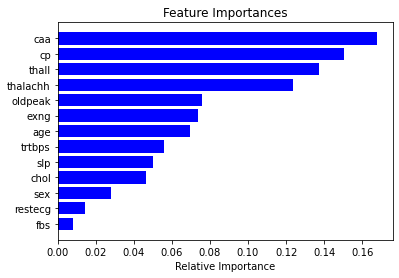

In [82]:
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

# cp: Chest pain / trtbps: Resting blood pressure / chol: Cholestoral

# fbs: fasting blood sugar > 120 mg / restecg: Resting electrocardiographic results

# thalachh: Maximum heart rate achieved / exng: Exercise induced angina ~ 1 = Yes, 0 = No

# oldpeak: Previous peak / slp: Slope / caa: Number of major vessels

# thall: Thalium Stress Test result ~ (0,3) / output: Target variable

According to the Random Forest Clasification Model the Important features are Caa which is Number of Major Vessels and Cp for Chest Pain 